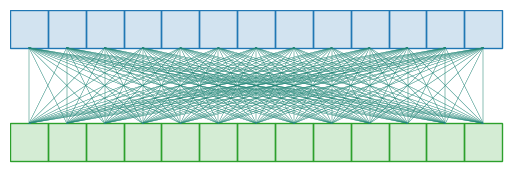

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

# 定义序列的长度
N = 13

# 创建新的figure和axes
fig, ax = plt.subplots()

# 设置图形的宽高比
ax.set_aspect('equal')

# 获取seaborn的调色板
palette = sns.color_palette()

# 画出两个序列的正方形
for i in range(N):
    # 创建一个正方形，位置在(i, 0)和(i, 3)，大小为1x1
    rect1 = patches.Rectangle((i, 0), 1, 1, edgecolor=palette[2], facecolor=list(palette[2]) + [0.2])
    rect2 = patches.Rectangle((i, 3), 1, 1, edgecolor=palette[0], facecolor=list(palette[0]) + [0.2])

    # 将正方形添加到图形中
    ax.add_patch(rect1)
    ax.add_patch(rect2)

# 画出连接两个序列的线
for i in range(N):
    for j in range(N):
        # 创建一条线，从序列A的第i个元素的上边到序列B的第j个元素的下边
        ax.plot([i+0.5, j+0.5], [1, 3], color=list(palette[2]), linewidth=0.2)
        # 创建一条线，从序列B的第j个元素的上边到序列A的第i个元素的下边
        ax.plot([j+0.5, i+0.5], [3, 1], color=list(palette[0]), linewidth=0.2)

# 设置坐标轴的范围
ax.set_xlim(0, N+0.1)
ax.set_ylim(-0.1, 4)

# 隐藏坐标轴
ax.axis('off')

# 显示图形
plt.show()

# 保存图形为svg
fig.savefig("figs/self-attention.svg", format='svg')

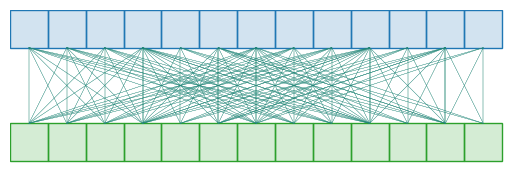

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

# 定义序列的长度
N = 13

# 创建新的figure和axes
fig, ax = plt.subplots()

# 设置图形的宽高比
ax.set_aspect('equal')

# 获取seaborn的调色板
palette = sns.color_palette()

# 画出两个序列的正方形
for i in range(N):
    # 创建一个正方形，位置在(i, 0)和(i, 3)，大小为1x1
    rect1 = patches.Rectangle((i, 0), 1, 1, edgecolor=palette[2], facecolor=list(palette[2]) + [0.2])
    rect2 = patches.Rectangle((i, 3), 1, 1, edgecolor=palette[0], facecolor=list(palette[0]) + [0.2])

    # 将正方形添加到图形中
    ax.add_patch(rect1)
    ax.add_patch(rect2)

# 定义正方形的类别
classes = {
    (0, 1, 2, 3): (0, 1, 2, 3, 6, 7, 8, 9),
    (3, 4, 5): (3, 4, 5, 9, 10, 11),
    (5,6): (5, 6, 11, 12),
    (6, 7, 8, 9) : (0, 1, 2, 3, 6, 7, 8, 9),
    (9, 10, 11):(3, 4, 5, 9, 10, 11),
    (11, 12) : (5, 6, 11, 12),
}


# 画出连接两个序列的线
for i in range(N):
    for j in range(N):
        # 检查两个正方形是否属于同一类
        for a_indices, b_indices in classes.items():
            if i in a_indices and j in b_indices:
                # 创建一条线，从序列A的第i个元素的上边到序列B的第j个元素的下边
                ax.plot([i+0.5, j+0.5], [1, 3], color=list(palette[2]), linewidth=0.2)
                # 创建一条线，从序列B的第j个元素的上边到序列A的第i个元素的下边
                ax.plot([j+0.5, i+0.5], [3, 1], color=list(palette[0]), linewidth=0.2)

# 设置坐标轴的范围
ax.set_xlim(0, N+0.1)
ax.set_ylim(-0.1, 4)

# 隐藏坐标轴
ax.axis('off')

# 显示图形
plt.show()

# 保存图形为svg
fig.savefig("figs/motif-attention.svg", format='svg')

In [2]:
from graph_tool.all import *
import numpy as np

In [9]:
g = Graph(
    [
        (0, 1), (1, 2), (2,0), (0, 3), (3,0),(0,4),(4,5),(5,6),(6,4),(4,7),(7,4),(4,0),
        (7,8),(8,7),(7,9),(9,10),(10,11),(11,9),(9,12),(12,13),(13,14),(14,13),(13,15),(15,16),(16,13)
    ]
        )

In [10]:
elabels = g.new_edge_property("int")
elabels.a = np.arange(len(np.array(g.edge_index))) + 1
pos = graph_draw(g, edge_text=elabels, vertex_fill_color='grey', output="figs/ori_traj.svg")

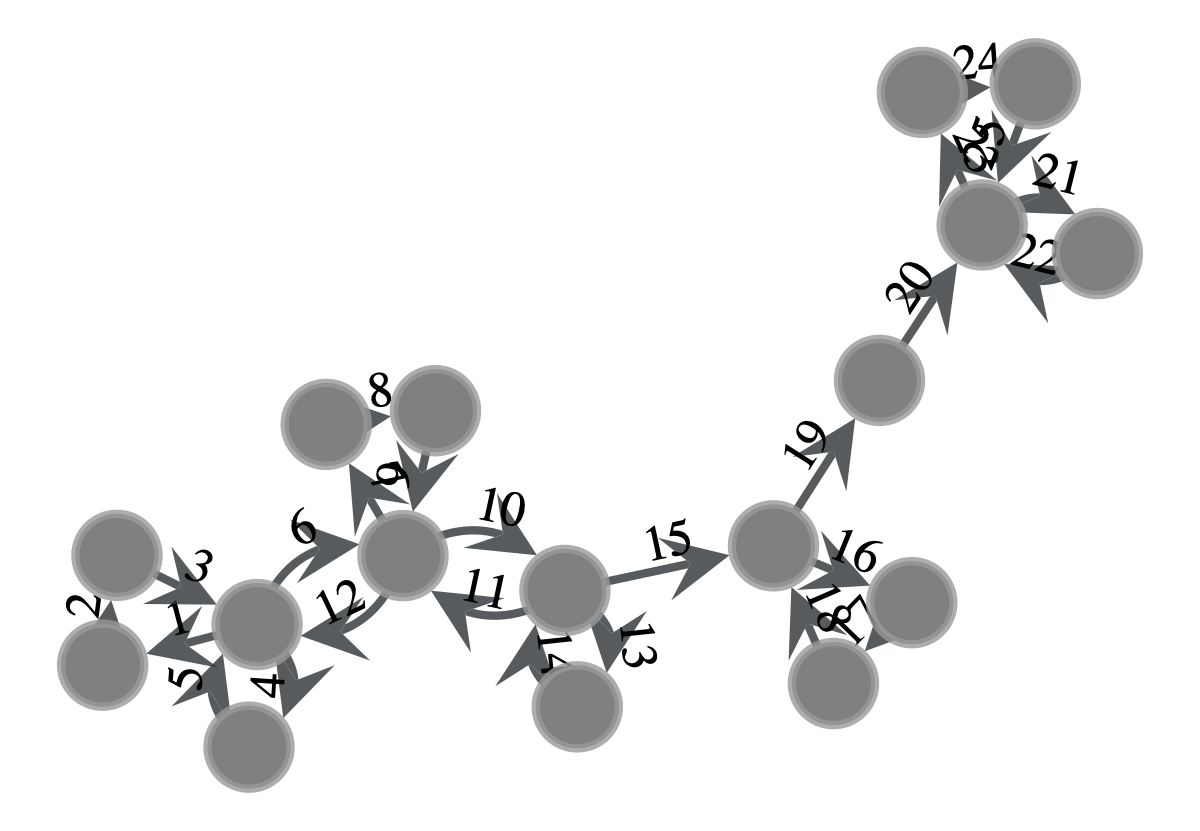

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x169b791f0, at 0x169b78c80>

In [12]:
graph_draw(g, pos=pos, edge_text=elabels, vertex_fill_color='grey')

In [5]:
graph_draw(g, pos=pos, edge_text=elabels, output="figs/ori_traj_wc.svg")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x11cd2d2e0, at 0x11fb482f0>